## Spin coating notebook


The goal of this exercise is to deposite photoresist uniformly on the wafer, to prepare for the photolithography step.
To do so, the resist used is called ["AZ 1512 HS"](https://www.epfl.ch/research/facilities/cmi/process/photolithography/photoresist-selection/az-1512-hs/), available in CMi. 
The thickness that you will deposite is crucial to be able to developpe correctly the resist.
The goal of this exercise is to generate the curve of the thickness [$\mu m$] in function of the rotation speed [$rpm$], so that you can choose the correct parameter on the machine.
For the resist mentionned above, the relation between the two variables is expressed as :
\begin{equation}
T = \alpha \cdot \omega^\beta [\mu m]
\end{equation}

with $\alpha$ = 94.67679 and $\beta$ = 0.52672

Now, it's your turn to generate the thickness/rotation speed curve. To do so, create an array of rotation speed with the ["np.array function"](https://numpy.org/doc/stable/reference/generated/numpy.array.html)






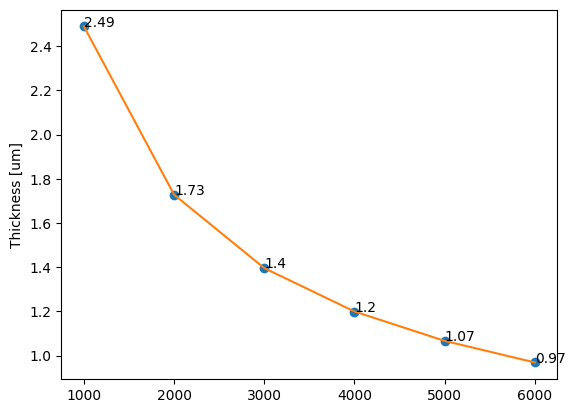

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

alpha = 94.67679
beta = 0.52672
omega = np.array([1000, 2000, 3000, 4000, 5000, 6000])

t = alpha*(omega**-beta)
interp = interpolate.interp1d(omega,t)

for i,j in zip(omega, t):
    plt.text(i, j, round(float(j),2))
    
plt.plot(omega, interp(omega), 'o', omega, t)
plt.ylabel('Rotation speed [rpm]')
plt.ylabel('Thickness [um]')
plt.show()

Based on the plot above, what rpm would you choose ?


In [18]:
omega = 3000

In [3]:
pip install ipycanvas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
from ipycanvas import Canvas
#creation of the substrate
canvas = Canvas(size=(500, 500))
canvas.fill_style = 'blue'
canvas.stroke_style = 'blue'
canvas.fill_rect(350, 100, 200, 50) #x, y, width, height
canvas.stroke_rect(350, 100, 200, 50)
#creation of the oxyde layer
canvas.fill_style = 'orange'
canvas.stroke_style = 'orange'
canvas.fill_rect(350, 70, 200, 30) #x, y, width, height
canvas.stroke_rect(350, 60, 200, 30)
#creation of the resist in function of the thickness that has been depositied
canvas.fill_style = 'red'
canvas.stroke_style = 'red'
canvas.fill_rect(350, 70- 10*alpha*(omega**-beta), 200,  10*alpha*(omega**-beta)) #x, y, width, height
canvas.stroke_rect(350,950, 200, 50)
#display the result
canvas

Canvas()

<div class="alert-success"> Propose different solutions ; the student should response "HMDS process" to improve the adhesion. One possibility is to show wafers after spin coating with and without HMDS (see the difference when we put water on each wafer)
</div>

### Block II
<div class="alert-info">
Propose different resists with different properties (need to be determined, depends on the final goal of the process --> discuss with Hernan)
</div>


<div class="alert-danger">
Which resist would you chose, considering the final application and specifications of the process ?
</div>

<div class="alert-success">
If the resist is not the correct one, explain the caracteristics of the chosen one and why this is not a good choice ; go back to the next step !
</div>

### Block III 
<div class="alert-info">
Presentation of an interactive exercise ; introduce the formula of the course that allows to determine the thickness of the resist based on different parameters (concentration of the resist, rotation speed, etc.)
</div>

<div class="alert-danger">
Implement the main part of the code to generate the curve and/or the final thickness, based on the parameters determined by the student. The student will apply the parameters and this will generate the curve until the correct parameters are selected.
</div>

\begin{equation}
T = K C^\beta \eta^\gamma / \omega^\alpha
\end{equation}

### Block IV 
<div class="alert-info">
In reality, the desired thickness is never exact due to multiple reasons ; cite them (need to be discussed with Hernan)
</div>

<div class="alert-danger">
Which step could be here useful to check the thickness that has been deposited ? Different methods are presented (mechanical, ellipsometer), the student should be able to answer correctly
</div>

### Block V 
<div class="alert-info">
This section will present real cases ; show different screenshots obtained with the ellipsometer and chose the one that seems realistic, since the process has been done by someone with experience
</div>